In [1]:
! wget https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip

--2023-03-01 18:26:49--  https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.128, 74.125.24.128, 142.250.4.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13568290 (13M) [application/zip]
Saving to: ‘jena_climate_2009_2016.csv.zip’

jena_climate_2009_2 100%[===================>]  12.94M   698KB/s    in 15s     

2023-03-01 18:27:10 (867 KB/s) - ‘jena_climate_2009_2016.csv.zip’ saved [13568290/13568290]



In [2]:
! unzip jena_climate_2009_2016.csv.zip

Archive:  jena_climate_2009_2016.csv.zip
  inflating: jena_climate_2009_2016.csv  


In [1]:
import pandas as pd 


df = pd.read_csv('jena_climate_2009_2016.csv')

df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [4]:
time = pd.to_datetime(df.pop('Date Time'), format='%d.%m.%Y %H:%M:%S')
series = df['T (degC)'][5::6]
series.index = time[5::6]

In [6]:
import numpy as np 

# function for generating the lagged matrix
def split_sequence(sequence, window_size):
    X = []
    y = []
    # for all indexes
    for i in range(len(sequence)):
        end_idx = i + window_size 
        # exit condition
        if end_idx > len(sequence) - 1:
            break 
        # get X and Y values 
        seq_x, seq_y = sequence[i:end_idx], sequence[end_idx]
        X.append(seq_x)
        y.append(seq_y)
    
    return np.array(X), np.array(y)

In [7]:
train = series[:-int(len(series) / 10)]

train

Date Time
2009-01-01 01:00:00   -8.05
2009-01-01 02:00:00   -8.88
2009-01-01 03:00:00   -8.81
2009-01-01 04:00:00   -9.05
2009-01-01 05:00:00   -9.63
                       ... 
2016-03-11 16:00:00    2.93
2016-03-11 17:00:00    2.29
2016-03-11 18:00:00    2.48
2016-03-11 19:00:00    2.77
2016-03-11 20:00:00    2.80
Name: T (degC), Length: 63082, dtype: float64

In [8]:
test = series[-int(len(series) / 10):]
test

Date Time
2016-03-11 21:00:00    2.75
2016-03-11 22:00:00    2.46
2016-03-11 23:00:00    1.93
2016-03-12 00:00:00    1.87
2016-03-12 01:00:00    1.93
                       ... 
2016-12-31 19:10:00   -0.98
2016-12-31 20:10:00   -1.40
2016-12-31 21:10:00   -2.75
2016-12-31 22:10:00   -2.89
2016-12-31 23:10:00   -3.93
Name: T (degC), Length: 7009, dtype: float64

In [9]:
X_train, y_train = split_sequence(train, window_size=24)

In [10]:
X_train

array([[-8.05, -8.88, -8.81, ..., -4.5 , -4.47, -4.54],
       [-8.88, -8.81, -9.05, ..., -4.47, -4.54, -4.44],
       [-8.81, -9.05, -9.63, ..., -4.54, -4.44, -4.29],
       ...,
       [ 3.4 ,  3.13,  3.27, ...,  2.98,  2.93,  2.29],
       [ 3.13,  3.27,  3.13, ...,  2.93,  2.29,  2.48],
       [ 3.27,  3.13,  3.2 , ...,  2.29,  2.48,  2.77]])

In [11]:
X_train.shape

(63058, 24)

# Modeling time series using regression

regression algorithm try to find the line of best fit for a given dataset. the linear regression tries to minimize the value of the sum of the squares of the differences between the observed value and predicted value. OLS regression has several underlying assumptions called `Gauss-Markov assumptions`. Gauss-Markov assumptions for cross-sectional data include the following:

1. the parameters (the value of the slope of the best fit line in a two variable regression line, for example) should be linear
2. `X` and `Y` should be random variables.2
3. no perfect colinearity between multiple independent variables.
4. the covariance of the residual term and the independent variables should be 0, or in other words, the residual term is endogenous.
5. homoscedasticity for the residual term, ie the variance in the residual term should not change with a change in the independent variable.
6. no autocorrelation in the residual terms

for time series data, we cannot satisfy the assumption that the independent variables are all random variables since different columns are coming from the same process. to compensate for that the assumpptions on autocorrelation, homoscedasticity and endogeneity are more strict 

In [12]:
import statsmodels.api as sm 

# train ordinary least square model
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train)
result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 3.376e+05
Date:                Thu, 02 Mar 2023   Prob (F-statistic):               0.00
Time:                        21:16:16   Log-Likelihood:                -70605.
No. Observations:               63058   AIC:                         1.413e+05
Df Residuals:                   63033   BIC:                         1.415e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0317      0.005      6.986      0.000       0.023       0.041
x1            -0.1288      0.004    -32.606      0.000      -0.137      -0.121
x2             0.0669      0.007     10.283      0.000       0.054       0.080
x3             0.0571      0.007      8.707      0.000       0.044       0.070
x4             0.0381      0.007      5.793      0.000       0.025       0.051
x5             0.0081      0.007      1.239      0.216      -0.005       0.021
x6             0.0125      0.007      1.905      0.057      -0.000       0.025
x7            -0.0164      0.007     -2.489      0.013      -0.029      -0.003
x8             0.0062      0.007      0.939      0.348      -0.007       0.019
x9            -0.0069      0.007     -1.056      0.291      -0.020       0.006
x10            0.0148      0.007      2.256      0.024       0.002       0.028
x11            0.0029      0.007      0.436      0.663      -0.010       0.016
x12            0.0129      0.007      1.969      0.049    5.75e-05       0.026
x13           -0.0018      0.007     -0.272      0.786      -0.015       0.011
x14           -0.0033      0.007     -0.502      0.616      -0.016       0.010
x15           -0.0180      0.007     -2.731      0.006      -0.031      -0.005
x16           -0.0029      0.007     -0.437      0.662      -0.016       0.010
x17            0.0157      0.007      2.382      0.017       0.003       0.029
x18           -0.0016      0.007     -0.239      0.811      -0.014       0.011
x19           -0.0006      0.007     -0.092      0.927      -0.013       0.012
x20           -0.0062      0.007     -0.949      0.343      -0.019       0.007
x21           -0.0471      0.007     -7.163      0.000      -0.060      -0.034
x22           -0.0900      0.007    -13.716      0.000      -0.103      -0.077
x23           -0.2163      0.007    -33.219      0.000      -0.229      -0.204
x24            1.3010      0.004    329.389      0.000       1.293       1.309
==============================================================================
Omnibus:                    11270.669   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           181803.608
Skew:                          -0.388   Prob(JB):                         0.00
Kurtosis:                      11.282   Cond. No.                         197.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

A `Durbin-Watson` value greater than 2 suggests that the series has no autocorrelation

checking for normality can be done with the following tests:
1. Jarque-Bera test
2. Shapiro-Wilk test
3. Koglomorov-Smirnov test

In [13]:
from scipy import stats 

# get values of the residuals
residual = result.resid 

# run tests and get the p values
print('p value of Jarque-Bera test is: ', stats.jarque_bera(residual)[1])
print('p value of Shapiro-Wilk test is: ', stats.shapiro(residual)[1])
print('p value of Kolmogorov-Smirnov test is: ', stats.kstest(residual, 'norm')[1])

p value of Jarque-Bera test is:  0.0
p value of Shapiro-Wilk test is:  0.0
p value of Kolmogorov-Smirnov test is:  0.0


/usr/lib/python3/dist-packages/scipy/stats/_morestats.py:1761: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


assuming a significance level of 0.05, all of three suggest that the series is not normally distributed.

for heterisdasticity, we will use the following tests:
1. Bruesch-Pagon test
2. White test

In [14]:
import statsmodels.stats.api as sms 

print('p value of Breusch–Pagan test is: ', 
      sms.het_breuschpagan(result.resid, result.model.exog)[1])
print('p value of white test is: ', 
      sms.het_white(result.resid, result.model.exog)[1])

p value of Breusch–Pagan test is:  2.996182722664035e-246
p value of white test is:  0.0


assuming a significance level of 0.05, the two suggest that the series is heteroscedastic

the series is neither homoscedastic nor normally distributed. lucky for us, unlike OLS, generalized least squares accounts for these residual errors.

In [15]:
import statsmodels.api as sm 

# train ordinary least square model
X_train = sm.add_constant(X_train)
model = sm.GLS(y_train, X_train)
result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            GLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.992
Model:                            GLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 3.376e+05
Date:                Thu, 02 Mar 2023   Prob (F-statistic):               0.00
Time:                        21:16:38   Log-Likelihood:                -70605.
No. Observations:               63058   AIC:                         1.413e+05
Df Residuals:                   63033   BIC:                         1.415e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0317      0.005      6.986      0.000       0.023       0.041
x1            -0.1288      0.004    -32.606      0.000      -0.137      -0.121
x2             0.0669      0.007     10.283      0.000       0.054       0.080
x3             0.0571      0.007      8.707      0.000       0.044       0.070
x4             0.0381      0.007      5.793      0.000       0.025       0.051
x5             0.0081      0.007      1.239      0.216      -0.005       0.021
x6             0.0125      0.007      1.905      0.057      -0.000       0.025
x7            -0.0164      0.007     -2.489      0.013      -0.029      -0.003
x8             0.0062      0.007      0.939      0.348      -0.007       0.019
x9            -0.0069      0.007     -1.056      0.291      -0.020       0.006
x10            0.0148      0.007      2.256      0.024       0.002       0.028
x11            0.0029      0.007      0.436      0.663      -0.010       0.016
x12            0.0129      0.007      1.969      0.049    5.75e-05       0.026
x13           -0.0018      0.007     -0.272      0.786      -0.015       0.011
x14           -0.0033      0.007     -0.502      0.616      -0.016       0.010
x15           -0.0180      0.007     -2.731      0.006      -0.031      -0.005
x16           -0.0029      0.007     -0.437      0.662      -0.016       0.010
x17            0.0157      0.007      2.382      0.017       0.003       0.029
x18           -0.0016      0.007     -0.239      0.811      -0.014       0.011
x19           -0.0006      0.007     -0.092      0.927      -0.013       0.012
x20           -0.0062      0.007     -0.949      0.343      -0.019       0.007
x21           -0.0471      0.007     -7.163      0.000      -0.060      -0.034
x22           -0.0900      0.007    -13.716      0.000      -0.103      -0.077
x23           -0.2163      0.007    -33.219      0.000      -0.229      -0.204
x24            1.3010      0.004    329.389      0.000       1.293       1.309
==============================================================================
Omnibus:                    11270.669   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           181803.608
Skew:                          -0.388   Prob(JB):                         0.00
Kurtosis:                      11.282   Cond. No.                         197.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

get the prediction

# Modeling time series with recurrent network

RNN or recurrent neural network have a hidden layer that acts as a memory function that takes into account the previous timesteps while calculating what the next value in the sequence (the present timestep should be)

recurrent network suffer from issues like vanishing and exploding gradient. to solve for these, LSTM came into being. they add multiple gates, like input and forget gate to avoid the problem of exploding or vanishing gradient.

other way of dealing with the problem include gradient clipping and identity initialization



In [16]:
df = pd.read_csv('jena_climate_2009_2016.csv')

time_vals = pd.to_datetime(df.pop('Date Time'), 
            format='%d.%m.%Y %H:%M:%S')
series = df['T (degC)'][5::6]
series.index = time_vals[5::6]

In [20]:
# train test split
train = series[:-int(len(series)/10)]
train_idx = train.index
test = series[-int(len(series)/10):]
test_idx = test.index

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train = pd.Series(scaler.fit_transform(train.values.reshape(-1, 1))[:, 0], index=train_idx)
test = pd.Series(scaler.transform(test.values.reshape(-1, 1))[:, 0], index=test_idx)

use the log matrix generation function defined earlier to create the test and train datasets

In [22]:
window_size = 24 

X_train, y_train = split_sequence(train, window_size=window_size)
X_test, y_test = split_sequence(test, window_size=window_size)

convert all the data into tensors, and subsequently a torch `TorchDataset`and `DataLoader`

In [23]:
import torch 
from torch.utils.data import TensorDataset, DataLoader

# convert train and test data to tensors
X_train = torch.tensor(X_train, dtype=torch.float)
y_train = torch.tensor(y_train, dtype=torch.float)
X_test = torch.tensor(X_test, dtype=torch.float)
y_test = torch.tensor(y_test, dtype=torch.float)

# use torch tensor datasets
train_data = TensorDataset(X_train, y_train)
test_data = TensorDataset(X_test, y_test)

# get data loaders
batch_size = 32
train_dataloader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
test_dataloader = DataLoader(test_data, shuffle=False, batch_size=batch_size)

define the module to define the neural network architecture. we make the provisions for 
1. Vanilla LSTM
2. Stacked LSTM 
3. Bidirectional LSTM
4. One fully connected layer after the LSTM

In [25]:
from torch import nn


class DenseLSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, lstm_layers=1, bidirectional=False, dense=False):
        super(DenseLSTM, self).__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.layers = lstm_layers
        self.bidirectional = bidirectional
        self.dense = dense
        # define the LSTM layer
        self.lstm = nn.LSTM(input_size=self.input_dim, 
                            hidden_size=self.hidden_dim, 
                            num_layers=self.layers,
                            bidirectional=self.bidirectional)
        self.act1 = nn.ReLU()
        # change linear layer inputs depending on if lstm is bidrectional
        if not bidirectional:
            self.linear = nn.Linear(self.hidden_dim, self.hidden_dim)
        else:
            self.linear = nn.Linear(self.hidden_dim * 2, self.hidden_dim)
        self.act2 = nn.ReLU()
        # change linear layer inputs depending on if lstm is bidrectional and extra dense layer isn't added
        if bidirectional and not dense:
            self.final = nn.Linear(self.hidden_dim * 2, 1)
        else:
            self.final = nn.Linear(self.hidden_dim, 1)


    def forward(self, inputs, labels=None):
        out = inputs.unsqueeze(1)
        out, h = self.lstm(out)
        out = self.act1(out)
        if self.dense:
            out = self.linear(out)
            out = self.act2(out)
        out = self.final(out)
        return out

define the trainig function

In [26]:
import time 

def fit(model, optimizer, criterion, epochs, device):
    print("{:<8} {:<25} {:<25} {:<25}".format(
        'Epoch', 'Train Loss', 'Test Loss', 'Time (seconds)'
    ))

    for epoch in range(epochs):
        model.train()
        start = time.time()
        epoch_loss = []
        # for batch in train data
        for step, batch in enumerate(train_dataloader):
            # make gradient zero to avoid accumulation 
            model.zero_grad()
            batch = tuple(t.to(device) for t in batch)
            inputs, labels = batch 
            # get predictions 
            out = model(inputs)

define the hidden layer sizes, epochs, loss function and which optimizer we will use. we train the model and plot the prediction

Epoch    Train Loss                Test Loss                 Time (seconds)           


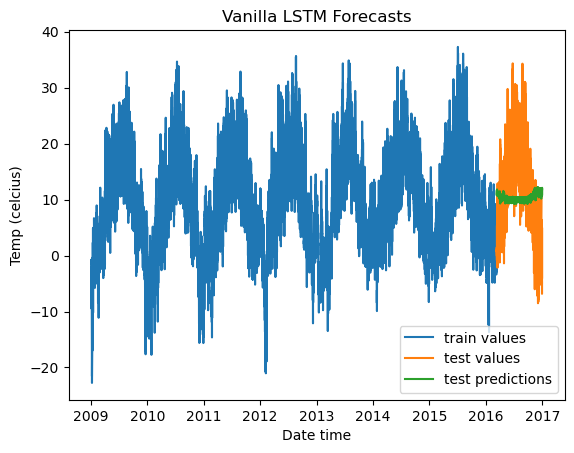

In [27]:
import matplotlib.pyplot as plt

device = torch.device(type='cpu')

hidden_dim = 32 
epochs = 5 

# vanilla LSTM 
model = DenseLSTM(window_size, hidden_dim, lstm_layers=1, bidirectional=False, 
                  dense=False)
model.to(device)

# define optimizer and loss function
optimizer = torch.optim.Adam(model.parameters())
criterion = nn.MSELoss()

# initiate training
fit(model, optimizer, criterion, epochs, device)

# get predictions on validation set
model.eval()
preds = []
for step, batch in enumerate(test_dataloader):
    batch = tuple(t.to(device) for t in batch) 
    inputs, labels = batch 
    out = model(inputs)
    preds.append(out)

preds = [x.float().detach().cpu().numpy() for x in preds]
preds = np.array([y for x in preds for y in x])

# plot data and predictions and applying inverse scaling on the data
plt.plot(pd.Series(scaler.inverse_transform(y_train.float().detach().cpu().numpy().reshape(-1, 1))[:, 0], index=train[window_size:].index), label='train values')
plt.plot(pd.Series(scaler.inverse_transform(y_test.float().detach().cpu().numpy().reshape(-1, 1))[:, 0], index=test[:-window_size].index), label='test values')
plt.plot(pd.Series(scaler.inverse_transform(preds.reshape(-1, 1))[:, 0], index=test[:-window_size].index), label='test predictions')
plt.xlabel('Date time')
plt.ylabel('Temp (celcius)')
plt.title('Vanilla LSTM Forecasts')
plt.legend()
plt.show()

Epoch    Train Loss                Test Loss                 Time (seconds)           


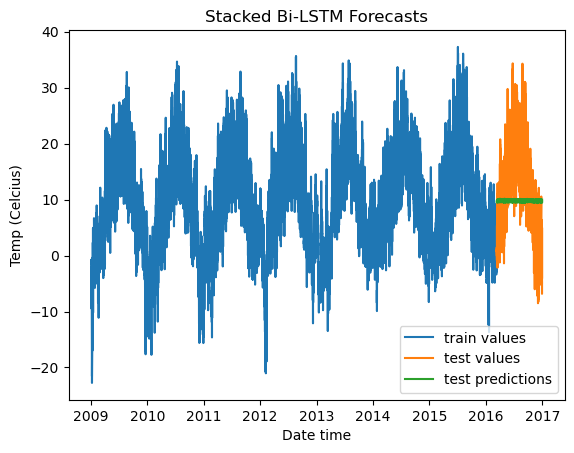

In [30]:
# Stacked bidirectional LSTM
model = DenseLSTM(window_size, hidden_dim, lstm_layers=2, bidirectional=True, dense=False)
model.to(device)

# define optimizer and loss function
optimizer = torch.optim.Adam(model.parameters())
criterion = nn.MSELoss()

# initate training
fit(model, optimizer, criterion, epochs, device)

# get predictions on validation set
model.eval()
preds = []
for step, batch in enumerate(test_dataloader):
    batch = tuple(t.to(device) for t in batch)
    inputs, labels = batch
    out = model(inputs)
    preds.append(out)

preds = [x.float().detach().cpu().numpy() for x in preds]
preds = np.array([y for x in preds for y in x])

# plot data and predictions and applying inverse scaling on the data
plt.plot(pd.Series(scaler.inverse_transform(y_train.float().detach().cpu().numpy().reshape(-1, 1))[:, 0], index=train[window_size:].index), label='train values')
plt.plot(pd.Series(scaler.inverse_transform(y_test.float().detach().cpu().numpy().reshape(-1, 1))[:, 0], index=test[:-window_size].index), label='test values')
plt.plot(pd.Series(scaler.inverse_transform(preds.reshape(-1, 1))[:, 0], index=test[:-window_size].index), label='test predictions')
plt.xlabel('Date time')
plt.ylabel('Temp (Celcius)')
plt.title('Stacked Bi-LSTM Forecasts')
plt.legend()
plt.show()

Epoch    Train Loss                Test Loss                 Time (seconds)           


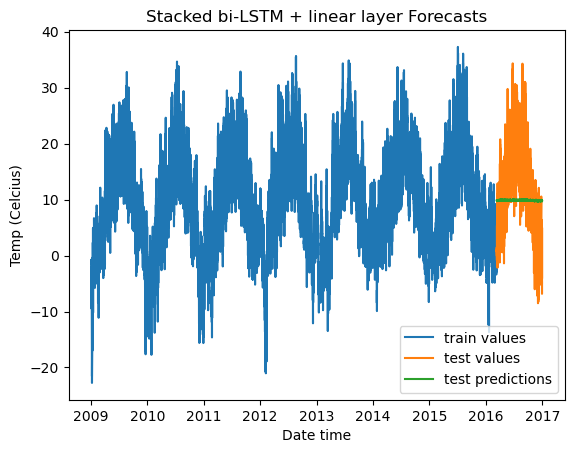

In [33]:
# stacked bidirectional LSTM plus a linear layer
model = DenseLSTM(window_size, hidden_dim, lstm_layers=2, 
                bidirectional=True, dense=True)
model.to(device) 

# define optimizer and loss function
optimizer = torch.optim.Adam(model.parameters())
criterion = nn.MSELoss()

# initiate training
fit(model, optimizer, criterion, epochs, device)

# get predictions on validation set
model.eval()
preds = []
for step, batch in enumerate(test_dataloader):
    batch = tuple(t.to(device) for t in batch)
    inputs, labels = batch 
    out = model(inputs) 
    preds.append(out)

preds = [x.float().detach().cpu().numpy() for x in preds]
preds = np.array([y for x in preds for y in x])

# plot data and predictions and applying inverse scaling on the data
plt.plot(pd.Series(scaler.inverse_transform(y_train.float().detach().cpu().numpy().reshape(-1, 1))[:, 0], index=train[window_size:].index), label='train values')
plt.plot(pd.Series(scaler.inverse_transform(y_test.float().detach().cpu().numpy().reshape(-1, 1))[:, 0], index=test[:-window_size].index), label='test values')
plt.plot(pd.Series(scaler.inverse_transform(preds.reshape(-1, 1))[:, 0], index=test[:-window_size].index), label='test predictions')
plt.xlabel('Date time')
plt.ylabel('Temp (Celcius)')
plt.title('Stacked bi-LSTM + linear layer Forecasts')
plt.legend()
plt.show()